In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import datetime as dt

c:\Users\manhm\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
customers_df= pd.read_csv('olist_customers_dataset.csv')
geolocation_df= pd.read_csv("olist_geolocation_dataset.csv")
items_df= pd.read_csv('olist_order_items_dataset.csv')
payments_df= pd.read_csv('olist_order_payments_dataset.csv')
reviews_df= pd.read_csv('olist_order_reviews_dataset.csv')
orders_df= pd.read_csv('olist_orders_dataset.csv')
products_df= pd.read_csv('olist_products_dataset.csv')
sellers_df= pd.read_csv('olist_sellers_dataset.csv')
category_translation_df= pd.read_csv('product_category_name_translation.csv')


In [50]:
unique_customers = customers_df['customer_unique_id'].nunique()
print(f"Số lượng khách hàng duy nhất: {unique_customers}")

Số lượng khách hàng duy nhất: 96096


In [4]:
list_df = [customers_df, geolocation_df,items_df,payments_df, reviews_df,orders_df, products_df, sellers_df, category_translation_df]

In [5]:
for df in list_df:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  

# Check null values and duplicate rows

In [6]:
datasets = [customers_df, geolocation_df, items_df, payments_df, reviews_df, orders_df, products_df, sellers_df, category_translation_df]
titles = ["customers", "geolocation", "items", "payments", "reviews", "orders", "products", "sellers", "category_translation"]

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='YlGnBu')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224,7,0,145903,"review_comment_title, review_comment_message"
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,2448,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,category_translation,"product_category_name, product_category_name_english",71,2,0,0,


In [7]:
for i in datasets:
    i.dropna(inplace=True)

In [8]:
for i in datasets:
    i.drop(i[i.duplicated()].index, axis=0, inplace=True)

In [9]:
data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='YlGnBu')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",738332,5,0,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",9839,7,0,0,
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",96461,8,0,0,
6,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32340,9,0,0,
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,category_translation,"product_category_name, product_category_name_english",71,2,0,0,


In [10]:
for df in list_df:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4  

Merging Data

In [11]:
merged_df= pd.merge(customers_df, orders_df, on="customer_id")
merged_df= merged_df.merge(reviews_df, on="order_id")
merged_df= merged_df.merge(items_df, on="order_id")
merged_df= merged_df.merge(products_df, on="product_id")
merged_df= merged_df.merge(payments_df, on="order_id")
merged_df= merged_df.merge(sellers_df, on='seller_id')
merged_df= merged_df.merge(category_translation_df, on='product_category_name')
merged_df.shape

(11578, 40)

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11578 entries, 0 to 11577
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    11578 non-null  object 
 1   customer_unique_id             11578 non-null  object 
 2   customer_zip_code_prefix       11578 non-null  int64  
 3   customer_city                  11578 non-null  object 
 4   customer_state                 11578 non-null  object 
 5   order_id                       11578 non-null  object 
 6   order_status                   11578 non-null  object 
 7   order_purchase_timestamp       11578 non-null  object 
 8   order_approved_at              11578 non-null  object 
 9   order_delivered_carrier_date   11578 non-null  object 
 10  order_delivered_customer_date  11578 non-null  object 
 11  order_estimated_delivery_date  11578 non-null  object 
 12  review_id                      11578 non-null 

In [13]:
merged_df.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g    

# RFM

“RFM” trong phân tích RFM là viết tắt của tính gần đây, tần suất và giá trị tiền tệ. Phân tích RFM là một cách sử dụng dữ liệu dựa trên hành vi của khách hàng hiện tại để dự đoán cách khách hàng mới có thể hành động trong tương lai. Mô hình RFM được xây dựng bằng cách sử dụng ba yếu tố chính:

mức độ gần đây nhất mà khách hàng đã giao dịch với một thương hiệu
mức độ thường xuyên họ đã tương tác với một thương hiệu
số tiền họ đã chi cho các sản phẩm và dịch vụ của một thương hiệu
một hệ thống CRM cơ bản có thể thực hiện theo dõi cơ bản ba đặc điểm dễ định lượng góp phần vào phân tích RFM:

Giá trị gần đây: Điều này đề cập đến khoảng thời gian kể từ lần tương tác cuối cùng của khách hàng với một thương hiệu, có thể bao gồm lần mua hàng cuối cùng của họ, lần truy cập trang web, sử dụng ứng dụng di động, lượt "thích" trên phương tiện truyền thông xã hội, v.v. Tính gần đây là một số liệu quan trọng vì những khách hàng đã tương tác với thương hiệu của bạn gần đây hơn có nhiều khả năng phản hồi các nỗ lực tiếp thị mới.

Giá trị tần suất: Điều này đề cập đến số lần khách hàng đã mua hàng hoặc tương tác theo cách khác với thương hiệu của bạn trong một khoảng thời gian cụ thể. Tần suất là một số liệu quan trọng vì nó cho thấy mức độ gắn bó sâu sắc của khách hàng với thương hiệu của bạn. Tần suất càng cao thì mức độ trung thành của khách hàng càng cao.

Giá trị tiền tệ: Đây là tổng số tiền mà khách hàng đã chi để mua sản phẩm và dịch vụ từ thương hiệu của bạn trong một khoảng thời gian cụ thể. Giá trị tiền tệ là một số liệu quan trọng vì những khách hàng đã chi tiêu nhiều nhất trong quá khứ có nhiều khả năng sẽ chi tiêu nhiều hơn trong tương lai

# Lấy 2 ngày sau 2 ngày cuối cùng để phân tích

In [14]:
# Chuyển cột sang kiểu datetime
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])

# Tính giá trị lớn nhất và cộng timedelta
present_day = merged_df['order_purchase_timestamp'].max() + dt.timedelta(days=2)
print(present_day)

2018-08-31 14:18:28


Lấy 2018-08-31 14:18:28 là ngày cuối cùng để tính RFM

In [15]:
print("Latest date in dataset: ", merged_df['order_purchase_timestamp'].max())

Latest date in dataset:  2018-08-29 14:18:28


# Xác định "Recency", "Frequency", "Monetary"

DataFrame recency_df tổng hợp dữ liệu về lần mua hàng gần đây nhất của từng khách hàng

In [16]:
recency_df= pd.DataFrame(merged_df.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max())
recency_df

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,000ec5bff359e1c0ad76a81a45cb598f,2018-08-21 11:34:26
2,00172711b30d52eea8b313a7f2cced02,2018-07-28 00:23:49
3,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00
4,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32
...,...,...
9328,ffeb904468642a1ce663a322629801cb,2018-06-27 11:57:41
9329,ffecceca389973ef16660d58696f281e,2018-04-25 12:08:11
9330,fff2ae16b99c6f3c785f0e052f2a9cfb,2018-04-20 11:03:47
9331,fff3e1d7bc75f11dc7670619b2e61840,2018-07-20 13:47:30


Câu lệnh này thêm một cột mới vào DataFrame recency_df để tính Recency, đại diện cho số ngày kể từ lần mua hàng gần nhất của mỗi khách hàng so với ngày tham chiếu (present_day)

In [17]:
recency_df['Recency']= recency_df['order_purchase_timestamp'].apply(lambda x: (present_day - x).days)
recency_df

,customer_unique_id,order_purchase_timestamp,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,113
1,000ec5bff359e1c0ad76a81a45cb598f,2018-08-21 11:34:26,10
2,00172711b30d52eea8b313a7f2cced02,2018-07-28 00:23:49,34
3,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00,6
4,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32,122
...,...,...,...
9328,ffeb904468642a1ce663a322629801cb,2018-06-27 11:57:41,65
9329,ffecceca389973ef16660d58696f281e,2018-04-25 12:08:11,128
9330,fff2ae16b99c6f3c785f0e052f2a9cfb,2018-04-20 11:03:47,133
9331,fff3e1d7bc75f11dc7670619b2e61840,2018-07-20 13:47:30,42


Tạo một DataFrame mới frequency_df, trong đó mỗi hàng đại diện cho một khách hàng duy nhất và số lượng đơn hàng mà khách hàng đó đã thực hiện (Frequency)

In [18]:
frequency_df = pd.DataFrame(merged_df.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index())
frequency_df.rename(columns={"order_id":"Frequency"}, inplace=True)
frequency_df

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,000ec5bff359e1c0ad76a81a45cb598f,1
2,00172711b30d52eea8b313a7f2cced02,1
3,001928b561575b2821c92254a2327d06,1
4,0019e8c501c85848ac0966d45226fa1d,1
...,...,...
9328,ffeb904468642a1ce663a322629801cb,1
9329,ffecceca389973ef16660d58696f281e,1
9330,fff2ae16b99c6f3c785f0e052f2a9cfb,1
9331,fff3e1d7bc75f11dc7670619b2e61840,1


In [19]:
frequency_df.value_counts('Frequency')

Frequency
1    9234
2      95
3       4
Name: count, dtype: int64

Tạo một DataFrame mới monetary_df để tính tổng giá trị thanh toán (Monetary) của từng khách hàng

In [20]:
monetary_df = merged_df.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary_df.columns = ['customer_unique_id', 'Monetary']
monetary_df.head()

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,000ec5bff359e1c0ad76a81a45cb598f,27.75
2,00172711b30d52eea8b313a7f2cced02,122.07
3,001928b561575b2821c92254a2327d06,329.62
4,0019e8c501c85848ac0966d45226fa1d,197.27


Gép lại thành bảng cuối với "Recency", "Frequency", "Monetary"

In [21]:
RF_df = recency_df.merge(frequency_df, on='customer_unique_id')
RFM_df = RF_df.merge(monetary_df, on='customer_unique_id').drop(columns='order_purchase_timestamp')
RFM_df.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90
1,000ec5bff359e1c0ad76a81a45cb598f,10,1,27.75
2,00172711b30d52eea8b313a7f2cced02,34,1,122.07
3,001928b561575b2821c92254a2327d06,6,1,329.62
4,0019e8c501c85848ac0966d45226fa1d,122,1,197.27


In [22]:
RFM_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,9333.0,74.851709,42.532132,2.00,37.00,75.00,112.00,483.00
Frequency,9333.0,1.011036,0.108502,1.00,1.00,1.00,1.00,3.00
Monetary,9333.0,245.638111,641.607276,13.89,68.18,122.42,217.55,29099.52


In [23]:
RFM_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9333 entries, 0 to 9332
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  9333 non-null   object 
 1   Recency             9333 non-null   int64  
 2   Frequency           9333 non-null   int64  
 3   Monetary            9333 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 291.8+ KB


# Kiểm tra outlayer

Mục đích kiểm tra outlier
Trong các bài toán phân tích dữ liệu khách hàng, kiểm tra outliers trong các cột RFM là quan trọng vì:

Recency:

Các khách hàng có giá trị Recency rất cao (nghĩa là đã lâu không mua hàng) có thể là ngoại lệ.

Cần xác định xem có nên loại bỏ họ khỏi phân tích hoặc gán họ vào nhóm khách hàng không hoạt động.

Frequency:

Khách hàng mua hàng cực kỳ nhiều lần so với mức bình thường có thể là ngoại lệ hoặc là các khách hàng đặc biệt (ví dụ: khách hàng doanh nghiệp, đại lý bán lẻ).

Monetary:

Các giá trị Monetary rất cao có thể là do lỗi dữ liệu hoặc phản ánh các khách hàng chi tiêu vượt trội.

Cần kiểm tra xem giá trị ngoại lai này là hợp lý hay không.

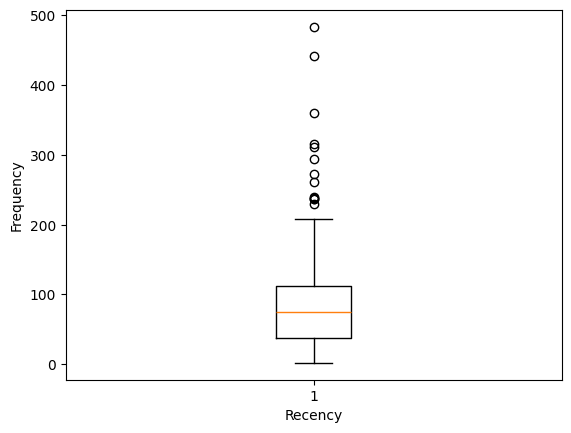

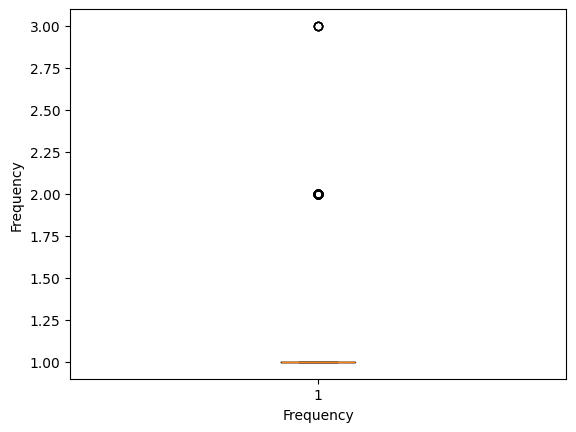

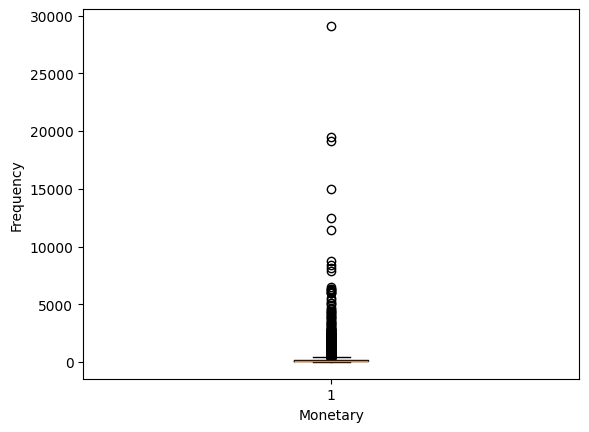

In [24]:
for i in ["Recency", "Frequency", "Monetary"]:
    plt.figure()
    plt.tight_layout()
    plt.gca().set(xlabel= i, ylabel='Frequency')
    plt.boxplot(RFM_df[i])

In [25]:
def num_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers_df= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return print("Number of outliers in {} column: ".format(col_name), len(outliers_df)), print("Indexes: ", outliers_df.index)

In [46]:
# for i in ["Recency", "Frequency", "Monetary"]:
#     num_outlier(RFM_df, i)
#     print("*"*40)

In [27]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1     
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    index_outliers= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)].index
    df_in= pd.DataFrame(df_in.drop(index_outliers.to_list(), axis=0, inplace=True))
    print("Outliers in the {} column have been removed".format(col_name))
    return df_in

In [28]:
for i in ["Recency", "Monetary"]:
    remove_outlier(RFM_df, i)
    print("*"*40)

Outliers in the Recency column have been removed
****************************************
Outliers in the Monetary column have been removed
****************************************


In [29]:
RFM_df.shape

(9230, 4)

In [30]:
RFM_df3= RFM_df.copy()

In [31]:
RFM_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9230 entries, 0 to 9332
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  9230 non-null   object 
 1   Recency             9230 non-null   int64  
 2   Frequency           9230 non-null   int64  
 3   Monetary            9230 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 360.5+ KB


In [32]:
RFM_df3.drop(['customer_unique_id'], axis=1, inplace=True, errors='ignore')


Kiểm tra độ lệch (skewness)

In [33]:
#check if data is skewed
from scipy import stats #library
def check_skew(df, column):
    skew = stats.skew(df[column])
    skewtest = stats.skewtest(df[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df[column])
    plt.show()
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

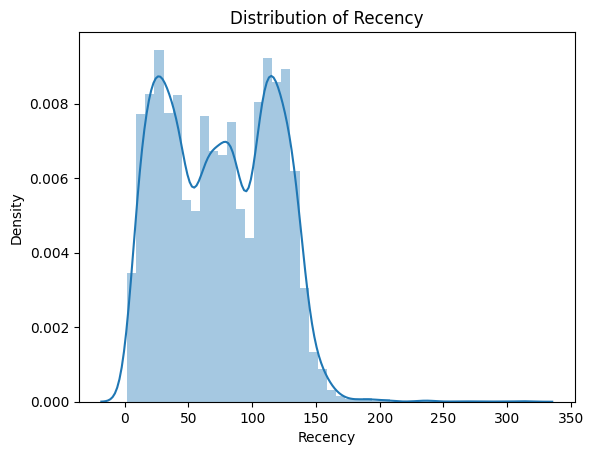

Recency's: Skew: 0.1619372871764706, : SkewtestResult(statistic=6.315734680036571, pvalue=2.6888101178853556e-10)


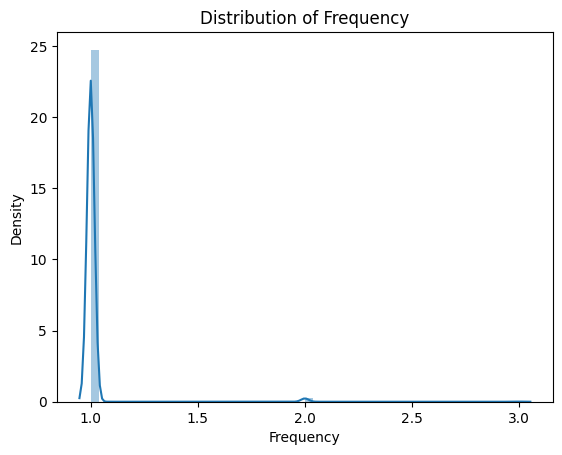

Frequency's: Skew: 10.349645263420909, : SkewtestResult(statistic=103.75024140372159, pvalue=0.0)


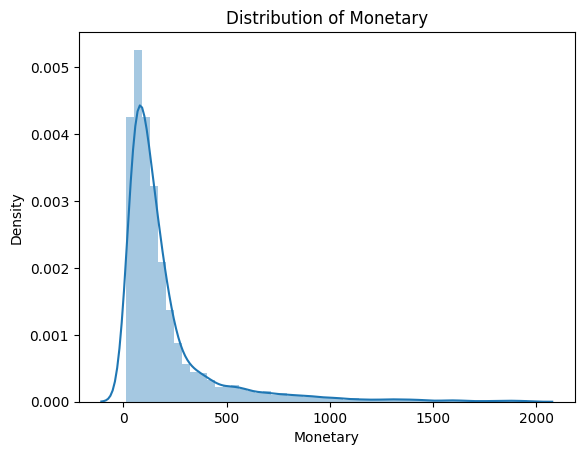

Monetary's: Skew: 3.251446417027698, : SkewtestResult(statistic=67.04111980675697, pvalue=0.0)


In [34]:
for col in RFM_df3.columns:
    check_skew(RFM_df3, col)

Log Transformation: Xử lý dữ liệu lệch phải.

In [35]:
RFM_log= RFM_df3.copy()
for i in RFM_log.columns[1:]:
    RFM_log[i] = np.log10(RFM_log[i])

In [36]:
RFM_log


,Recency,Frequency,Monetary
0,113,0.0,2.151982
1,10,0.0,1.443263
2,34,0.0,2.086609
3,6,0.0,2.518014
4,122,0.0,2.295061
...,...,...,...
9328,65,0.0,1.968996
9329,128,0.0,1.861893
9330,133,0.0,2.302980
9331,42,0.0,1.916507


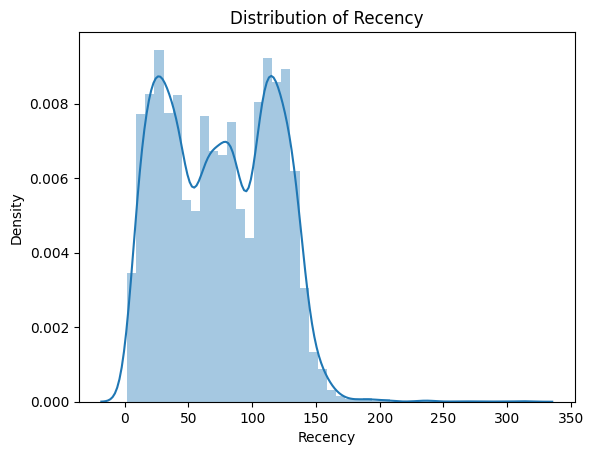

Recency's: Skew: 0.1619372871764706, : SkewtestResult(statistic=6.315734680036571, pvalue=2.6888101178853556e-10)


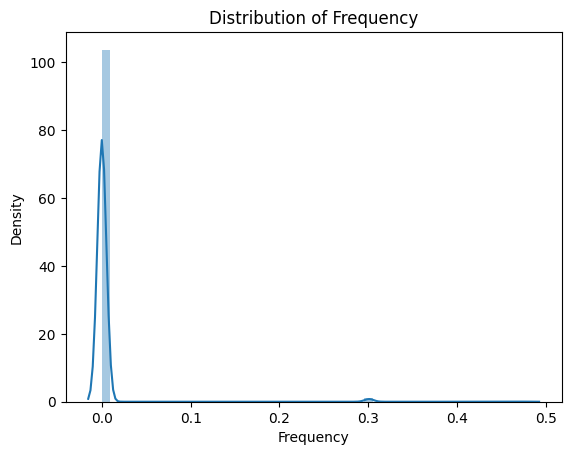

Frequency's: Skew: 9.799276686733617, : SkewtestResult(statistic=102.0025147527467, pvalue=0.0)


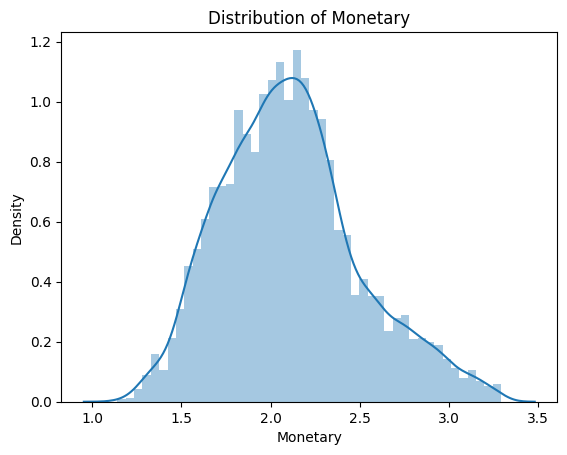

Monetary's: Skew: 0.47086296920199394, : SkewtestResult(statistic=17.58891351121991, pvalue=2.9956623488708254e-69)


In [37]:
for col in RFM_log.columns:
    check_skew(RFM_log, col)

StandardScaler

In [38]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

RFM_log_scaled= scaler.fit_transform(RFM_log)
RFM_log_scaled_df= pd.DataFrame(RFM_log_scaled)
RFM_log_scaled_df.columns = ['recency', 'frequency', 'monetary']
RFM_log_scaled_df.head()

,recency,frequency,monetary
0,0.911949,-0.10293,0.110615
1,-1.537370,-0.10293,-1.706436
2,-0.966655,-0.10293,-0.056993
3,-1.632489,-0.10293,1.049064
4,1.125967,-0.10293,0.477447


In [39]:
from sklearn.cluster import KMeans

In [40]:
kmeans= KMeans(n_clusters=4)
kmeans.fit(RFM_log_scaled_df)

KMeans(n_clusters=4)

In [41]:
RFM_log_scaled_df['Cluster']= kmeans.labels_
RFM_log_scaled_df.head()

,recency,frequency,monetary,Cluster
0,0.911949,-0.10293,0.110615,2
1,-1.537370,-0.10293,-1.706436,0
2,-0.966655,-0.10293,-0.056993,0
3,-1.632489,-0.10293,1.049064,0
4,1.125967,-0.10293,0.477447,2


In [51]:
RFM_log_scaled_df_culster = RFM_log_scaled_df['Cluster'].value_counts()

In [52]:
RFM_log_scaled_df['Cluster'].value_counts()

Cluster
0    3674
2    3551
3    1907
1      98
Name: count, dtype: int64

<BarContainer object of 4 artists>

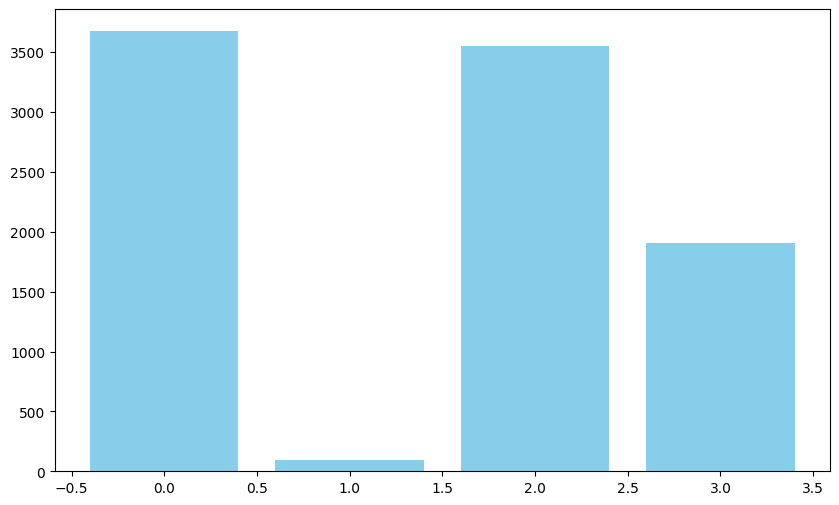

In [45]:
plt.figure(figsize=(10,6))
plt.bar(RFM_log_scaled_df_culster.index, RFM_log_scaled_df_culster.values, color='skyblue')

Khách hàng VIP (Champions)
Đặc điểm: Mua gần đây, thường xuyên, chi tiêu cao.
Hành động: Duy trì, ưu đãi đặc biệt.
Khách hàng Tiềm năng (Potential Loyalists)
Đặc điểm: Mua gần đây, tần suất và chi tiêu trung bình.
Hành động: Khuyến khích mua thường xuyên hơn.
Nguy cơ mất khách (At Risk)
Đặc điểm: Đã từng mua nhiều nhưng lâu không quay lại.
Hành động: Gửi ưu đãi, khơi gợi lại sự quan tâm.
Khách hàng ít giá trị (Low Value)
Đặc điểm: Lâu không mua, ít chi tiêu, tần suất thấp.
Hành động: Đánh giá tiềm năng, chạy quảng cáo chi phí thấp

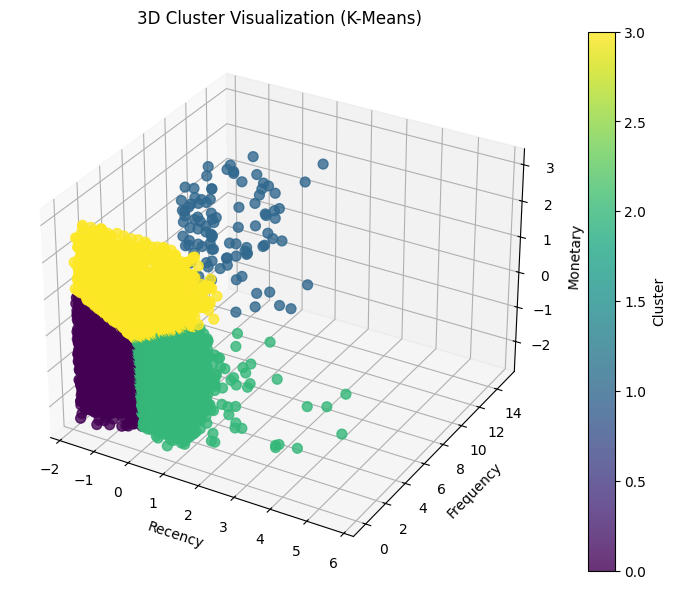

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Tạo figure và subplot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Lấy giá trị của các cột cần plot (Recency, Frequency, Monetary)
x = RFM_log_scaled_df['recency']
y = RFM_log_scaled_df['frequency']
z = RFM_log_scaled_df['monetary']
clusters = RFM_log_scaled_df['Cluster']  # Nhãn cụm

# Vẽ scatter plot 3D, sử dụng màu sắc để phân cụm
scatter = ax.scatter(x, y, z, c=clusters, cmap='viridis', s=50, alpha=0.8)

# Gắn nhãn trục
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Thêm tiêu đề
plt.title('3D Cluster Visualization (K-Means)')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

In [43]:
from sklearn.metrics import silhouette_score
silhouette_score(RFM_log_scaled_df[['recency', 'frequency', 'monetary']], RFM_log_scaled_df['Cluster'])


0.40022163402510563

In [53]:
RFM_log_scaled_df.head()

,recency,frequency,monetary,Cluster
0,0.911949,-0.10293,0.110615,2
1,-1.537370,-0.10293,-1.706436,0
2,-0.966655,-0.10293,-0.056993,0
3,-1.632489,-0.10293,1.049064,0
4,1.125967,-0.10293,0.477447,2


In [55]:
RFM_log_scaled_df.to_csv('RFM_log_scaled_df.csv', index=False)